In [1]:
import a_star_search
import algo

from a_star_search import *

from matplotlib import pyplot as plt
import sys
import os
import ipykernel
from consts import *

from entities.Entity import *
from entities.Robot import *
from entities.Instructions import *
from consts import *
from optimal_path import *


In [36]:
def plt_setup(grid_w, grid_h, obstacles, robot_pos, robot_dir=None, target_pos=None, target_dir=None):
    plt_simple_setup(grid_w, grid_h)
    for obs in obstacles:
        plt.plot(obs[0], obs[1], 'rs', markersize=8)
    if robot_dir is not None:
        plt_arrow(robot_dir, robot_pos, 'y', 0.5)
    else:
        plt.plot(robot_pos[0], robot_pos[1], 'yx', markersize=10)
    if target_dir is not None:
        plt_arrow(target_dir, target_pos, 'b', 0.5)
    else:
        plt.plot(target_pos[0], target_pos[1], 'bx', markersize=10)

def plt_simple_setup(grid_w, grid_h):
    plt.grid(True)
    plt.xticks(range(grid_w))
    plt.yticks(range(grid_h))
    plt.xlim(0, grid_w)
    plt.ylim(0, grid_h)
    plt.gca().set_aspect('equal', adjustable='box')
    ax = plt.gca()
    ax.set_axisbelow(True)

def plt_arrow(direction, pos, color, size=0.2):
    if direction == Direction.NORTH:
        plt.arrow(pos[0], pos[1], 0, .5, head_width=size, head_length=size, color=color, linewidth=1)
    elif direction == Direction.EAST:
        plt.arrow(pos[0], pos[1], 0.5, 0, head_width=size, head_length=size, color=color, linewidth=1)
    elif direction == Direction.SOUTH:
        plt.arrow(pos[0], pos[1], 0, -0.5, head_width=size, head_length=size, color=color, linewidth=1)
    elif direction == Direction.WEST:
        plt.arrow(pos[0], pos[1], -0.5, 0, head_width=size, head_length=size, color=color, linewidth=1)

def plt_path_points(path, color='g'):
    for point in path:
        plt.plot(point[0], point[1], color + 'o', markersize=5)
        plt_arrow(point[2], point, color, 0.2)

def plt_path_line(path, color='g'):
    for i in range(len(path) - 1):
        plt.plot([path[i][0], path[i + 1][0]], [path[i][1], path[i + 1][1]], color=color, linewidth=2)

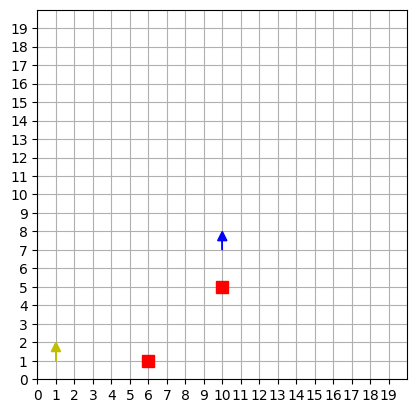

In [37]:
grid_w = 20
grid_h = 20
obstacles = [
    [10, 5],
    [6, 1]
]
robot_pos = [1, 1]
robot_d = Direction.NORTH
target_pos = [10, 7]
target_d = Direction.NORTH

plt_setup(grid_w, grid_h, obstacles, robot_pos, robot_d, target_pos, target_d)

In [38]:
grid_w = 20
grid_h = 20
obstacles = [
    [10, 5],
    [6, 1],
    [5, 6]
]
robot_pos = [1, 1]
robot_d = Direction.NORTH
target_pos = [10, 7]
target_d = Direction.NORTH

results = a_star_search(grid_w, grid_h, obstacles, robot_pos, robot_d, target_pos, target_d)
print(results[0])
print(results[1])


[((1, 1), <Direction.NORTH: 0>), ((1, 2), <Direction.NORTH: 0>), ((4, 3), <Direction.EAST: 2>), ((5, 3), <Direction.EAST: 2>), ((6, 3), <Direction.EAST: 2>), ((7, 6), <Direction.NORTH: 0>), ((10, 7), <Direction.EAST: 2>), ((9, 7), <Direction.EAST: 2>), ((10, 10), <Direction.NORTH: 0>), ((10, 9), <Direction.NORTH: 0>), ((10, 8), <Direction.NORTH: 0>), ((10, 7), <Direction.NORTH: 0>)]
19


(1, 1) Direction.NORTH
(1, 2) Direction.NORTH
(4, 3) Direction.EAST
(5, 3) Direction.EAST
(6, 3) Direction.EAST
(7, 6) Direction.NORTH
(10, 7) Direction.EAST
(9, 7) Direction.EAST
(10, 10) Direction.NORTH
(10, 9) Direction.NORTH
(10, 8) Direction.NORTH
(10, 7) Direction.NORTH


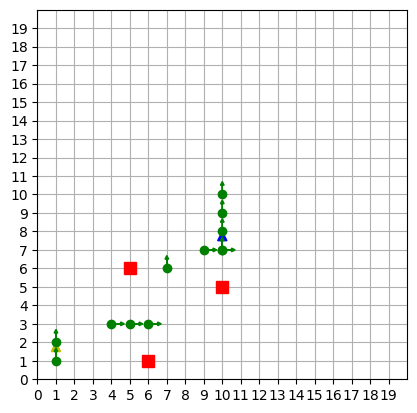

In [39]:
plt_setup(grid_w, grid_h, obstacles, robot_pos, robot_d, target_pos, target_d)

for pos, dir in results[0]:
    print(pos, dir)
    plt.plot(pos[0], pos[1], 'go')
    plt_arrow(dir, pos, 'g')



    

[('FW', 2), ('FR', 0), ('FW', 4), ('FR', 0), ('FW', 4), ('FR', 0), ('FW', 4), ('FR', 0), ('FW', 12), ('FR', 0), ('FW', 4), ('FL', 0), ('FW', 2), ('FL', 0), ('FW', 4), ('FL', 0), ('FW', 5), ('FR', 0)]
[('FW', 2), ('FR', 0), ('FW', 4), ('FR', 0), ('FW', 4), ('FR', 0), ('FW', 4), ('FR', 0), ('FW', 12), ('FR', 0), ('FW', 4), ('FL', 0), ('FW', 2), ('FL', 0), ('FW', 4), ('FL', 0), ('FW', 5), ('FR', 0)]
['FW10', 'FR', 'FW20', 'FR', 'FW20', 'FR', 'FW20', 'FR', 'FW100', 'FR', 'FW20', 'FL', 'FL', 'FW20', 'FL', 'FW40']


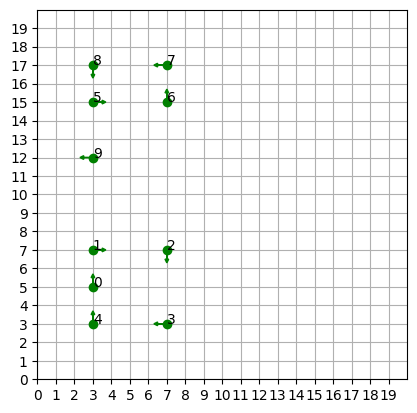

In [41]:
def get_transform(point1, point2):
    '''
    returns a tuple of the transform from point1 to point2
    '''
    transform = [point2[0]- point1[0], point2[1] - point1[1]]
    if transform[0]>=1:
        transform[0] = 1
    elif transform[0]<=-1:
        transform[0] = -1
    else: transform[0] = 0

    if transform[1]>=1:
        transform[1] = 1
    elif transform[1]<=-1:
        transform[1] = -1
    else: transform[1] = 0

    return transform

def points_to_action(point1, point2):
    '''
    returns a tuple of the action from point1 to point2
    '''
    # (1,1, Direction.NORTH) -> (1,2, Direction.NORTH): "fw"
    # (1,3, Direction.NORTH) -> (1,1, Direction.NORTH): "bw"
    # (1,1, Direction.NORTH) -> (2,2, Direction.EAST): "fr"
    # (2,2, Direction.EAST) -> (1,1, Direction.NORTH): "br"
    # (1,2, Direction.NORTH) -> (2,1, Direction.WEST): "fl"
    # (2,1, Direction.WEST) -> (1,2, Direction.NORTH): "bl"

    transform = get_transform(point1, point2)

    if transform[0] == 0 and transform[1] == 0 and point1[2] == point2[2]:
        return (None, None)

    from_north = point1[2] == Direction.NORTH
    from_east = point1[2] == Direction.EAST
    from_south = point1[2] == Direction.SOUTH
    from_west = point1[2] == Direction.WEST
    to_north = point2[2] == Direction.NORTH
    to_east = point2[2] == Direction.EAST
    to_south = point2[2] == Direction.SOUTH
    to_west = point2[2] == Direction.WEST

    action = None
    # print(f"transform: {transform}, {point1[2]}, {point2[2]})")
    match (transform[0], transform[1], point1[2], point2[2]):
        case ((0, 1, Direction.NORTH, Direction.NORTH) |
                (0, -1, Direction.SOUTH, Direction.SOUTH) |
                (1, 0, Direction.EAST, Direction.EAST) |
                (-1, 0, Direction.WEST, Direction.WEST)):
            action = "fw"
        case ((0, -1, Direction.NORTH, Direction.NORTH) |
                (0, 1, Direction.SOUTH, Direction.SOUTH) |
                (-1, 0, Direction.EAST, Direction.EAST) |
                (1, 0, Direction.WEST, Direction.WEST)):
            action = "bw"
        
        case ((1, 1, Direction.NORTH, Direction.EAST) |
                (1, -1, Direction.EAST, Direction.SOUTH) |
                (-1, -1, Direction.SOUTH, Direction.WEST) |
                (-1, 1, Direction.WEST, Direction.NORTH)):
            action = "fr"
        case ((-1, 1, Direction.NORTH, Direction.WEST) |
                (-1, -1, Direction.WEST, Direction.SOUTH) |
                (1, -1, Direction.SOUTH, Direction.EAST) |
                (1, 1, Direction.EAST, Direction.NORTH)):
            action = "fl"
        case ((1, -1, Direction.NORTH, Direction.WEST) |
                (1, 1, Direction.WEST, Direction.SOUTH) |
                (1, -1, Direction.SOUTH, Direction.EAST) |
                (-1, 1, Direction.EAST, Direction.NORTH)):
                action = "br"
        case ((1, -1, Direction.NORTH, Direction.EAST) |
                (-1, 1, Direction.EAST, Direction.SOUTH) |
                (1, 1, Direction.SOUTH, Direction.WEST) |
                (1, -1, Direction.WEST, Direction.NORTH)):
                action = "bl"
        case _:
                print(f"Error: {point1} -> {point2} with transform {transform}")
                action = None
    turning_point = None
    if action[1] == "l" or action[1] == "r":
        match (point1[2], point2[2]):
            case ((Direction.NORTH, Direction.EAST) 
                    | (Direction.NORTH, Direction.WEST) 
                    | (Direction.SOUTH, Direction.EAST) 
                    | (Direction.SOUTH, Direction.WEST)):
                turning_point = (point1[0], point2[1], point2[2])
            case ((Direction.EAST, Direction.SOUTH) 
                    | (Direction.EAST, Direction.NORTH) 
                    | (Direction.WEST, Direction.SOUTH) 
                    | (Direction.WEST, Direction.NORTH)):
                turning_point = (point2[0], point1[1], point2[2])
    return (action, turning_point)

def clean_path(path):
    '''
    returns a cleaned path with points at the corners
    '''
    new_path = []
    new_path.append(path[0])
    prev_action = "start"
    for curr in path[1:]:
        
        action, turning_point = points_to_action(new_path[-1], curr)
        if turning_point: new_path.append(turning_point)
        new_path.append(curr)
    path = new_path
    new_path = []
    new_path.append(path[0])
    for idx in range(len(path)-2):
        p1 = path[idx]
        p2 = path[idx+1]
        p3 = path[idx+2]
        # print(f"p1: {p1}, p2: {p2}, p3: {p3}")
        t1 = get_transform(p1, p2)
        t2 = get_transform(p2, p3)
        if t1 != t2 and t2 != [0, 0]:
            new_path.append(p2)
    new_path.append(path[-1])
    return new_path

def path_to_grid_inst(clean_path):
    '''
        path is a list of tuples, where each tuple is a position and a direction
        returns a list of instructions

        example path = [((1, 1), Direction.NORTH), ((1, 2), Direction.NORTH), ((1, 3), Direction.NORTH)]
        example instructions = [
            "FR00",
            "FW10",
            "SNAP1",
            "FR00",
            "BW50",
            "FL00",
            "FW60",
            "SNAP2",
            ...,
            "FIN"
        ],
    '''

    def dir_to_matrix(dir):
        match dir:
            case Direction.NORTH:
                return (0, 1)
            case Direction.EAST:
                return (1, 0)
            case Direction.SOUTH:
                return (0, -1)
            case Direction.WEST:
                return (-1, 0)

    # for each triplet of points, get the action

    instructions = []
    for i in range(len(clean_path)-1):
        p1 = clean_path[i]
        p2 = clean_path[i+1]
        ut1 = tuple(get_transform(p1, p2))
        dist1 = abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])
        dir1 = dir_to_matrix(p1[2])
        dir2 = dir_to_matrix(p2[2])
        if dir1 == ut1:
            instructions.append(("FW", dist1))
        elif dir1 == (-ut1[0], -ut1[1]):
            instructions.append(("BW", dist1))
        
        # cross product of dir1 and dir2
        cross = dir1[0] * dir2[1] - dir1[1] * dir2[0]
        if cross < 0:
            instructions.append(("FR", 0))
            # instructions.append(("FW", dist1))
        elif cross > 0:
            instructions.append(("FL", 0))
            # instructions.append(("FW", dist1))
        else:
            print("Error: cross product is 0")
    # print(instructions)
    
    return instructions

def grid_inst_to_real_inst(grid_inst):

    for i in range(1,len(grid_inst)-1):
        inst = grid_inst[i]
        if inst[0] == "FW" or inst[0] == "BW":
            grid_inst[i] = (inst[0], inst[1])
        if inst[0] == "FL" or inst[0] == "FR" or inst[0] == "BL" or inst[0] == "BR":
            prev = grid_inst[i-1]
            curr = grid_inst[i]
            next = grid_inst[i+1]

            grid_inst[i-1] = (prev[0], prev[1] - TURN_RADIUS)
            grid_inst[i] = (curr[0], 1)
            grid_inst[i+1] = (next[0], next[1] - TURN_RADIUS)

    new_grid_inst = []
    for idx, inst in enumerate(grid_inst):
        if inst[1]<0:
            print("Error: Negative distance")
            new_grid_inst.append(inst)
        elif inst[1] == 0:
            continue
        else:
            new_grid_inst.append(inst)

    grid_inst = new_grid_inst
    new_grid_inst = []

    for idx, inst in enumerate(grid_inst):
        if inst[0] == "FW":
            new_grid_inst.append(f"{inst[0]}{inst[1]*REAL_CELL_SIZE}")
        elif inst[0] == "FL" or inst[0] == "FR" or inst[0] == "BL" or inst[0] == "BR":
            new_grid_inst.append(f"{inst[0]}")


    return new_grid_inst
            

# temp_path = path = [
#     (1,1,Direction.NORTH),
#     (1,3,Direction.NORTH),
#     (1,10,Direction.NORTH),
#     (1,5, Direction.NORTH),
#     (3,7, Direction.EAST),
#     (10,7, Direction.EAST),
#     (7,7, Direction.EAST),
# ]
    
            
    

dummypath = [
    (3,5, Direction.NORTH),
    (3,7, Direction.EAST),
    (7,7, Direction.SOUTH),
    (7,3, Direction.WEST),
    (3,3, Direction.NORTH),
    (3,15, Direction.EAST),
    (7,15, Direction.NORTH),
    (7,17, Direction.WEST),
    (3,17, Direction.SOUTH),
    (3, 12, Direction.WEST),
    # (15, 12, Direction.WEST),
    # (13, 12, Direction.WEST),
    # (17, 12, Direction.WEST),
]
plt_simple_setup(20, 20)
for idx, i in enumerate(dummypath):
    plt.plot(i[0], i[1], 'go')
    plt_arrow(i[2], i, 'g')
    plt.text(i[0], i[1], f"{idx}")
t = path_to_grid_inst(dummypath)
print(t)
t = grid_inst_to_real_inst(t)
print(t)



Error: cross product is 0
Error: cross product is 0
Error: cross product is 0
Error: cross product is 0
[(1, 1, <Direction.NORTH: 0>), (1, 10, <Direction.NORTH: 0>), (1, 5, <Direction.NORTH: 0>), (1, 7, <Direction.EAST: 2>), (10, 7, <Direction.EAST: 2>), (7, 7, <Direction.EAST: 2>)]
[('FW', 9), ('BW', 5), ('FW', 2), ('FR', 0), ('FW', 9), ('BW', 3)]


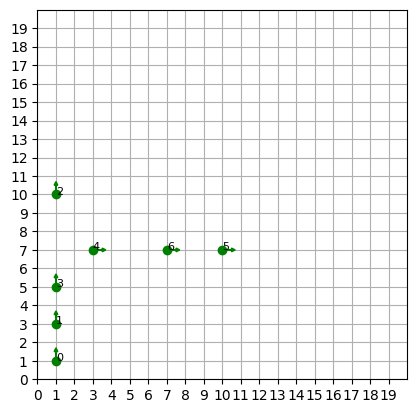

[(1, 1, <Direction.NORTH: 0>), (1, 10, <Direction.NORTH: 0>), (1, 5, <Direction.NORTH: 0>), (1, 7, <Direction.EAST: 2>), (10, 7, <Direction.EAST: 2>), (7, 7, <Direction.EAST: 2>)]


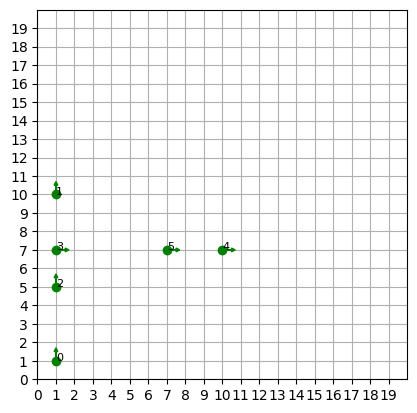

In [146]:

path = [
    (1,1,Direction.NORTH),
    (1,3,Direction.NORTH),
    (1,10,Direction.NORTH),
    (1,5, Direction.NORTH),
    (3,7, Direction.EAST),
    (10,7, Direction.EAST),
    (7,7, Direction.EAST),
]

new_path = clean_path(path)
instructions = path_to_grid_inst(new_path)
print(new_path)
print(instructions)

# plot old path
plt_simple_setup()
for idx, (posx, posy, dir) in enumerate(path):
    plt.plot(posx, posy, 'go')
    plt.text(posx, posy, str(idx), fontsize=8)
    plt_arrow(dir, (posx, posy), 'g')
plt.show()

# plot new path
print(new_path)
plt_simple_setup()
for idx, pos in enumerate(new_path):
    plt.plot(pos[0], pos[1], 'go')
    plt.text(pos[0], pos[1], str(idx), fontsize=8)
    if len(pos)> 2 and  pos[2] != None:
        plt_arrow(pos[2], (pos[0], pos[1]), 'g')
    

[(1, 1, <Direction.NORTH: 0>), (4, 2, <Direction.EAST: 2>), (5, 2, <Direction.EAST: 2>), (6, 5, <Direction.NORTH: 0>), (6, 4, <Direction.NORTH: 0>), (6, 4, <Direction.NORTH: 0>), (6, 5, <Direction.NORTH: 0>), (3, 6, <Direction.WEST: 6>), (2, 9, <Direction.NORTH: 0>), (5, 10, <Direction.EAST: 2>), (6, 10, <Direction.EAST: 2>), (7, 10, <Direction.EAST: 2>), (8, 10, <Direction.EAST: 2>), (9, 10, <Direction.EAST: 2>), (10, 7, <Direction.SOUTH: 4>), (10, 8, <Direction.SOUTH: 4>)]


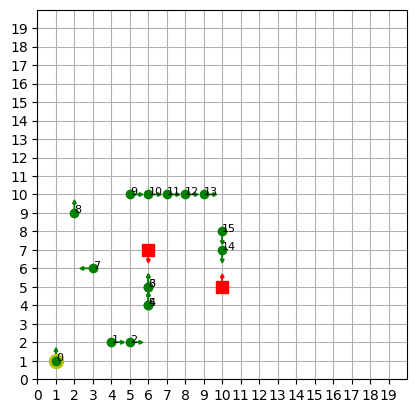

Error: cross product is 0
Error: cross product is 0
Error: cross product is 0
Error: cross product is 0
[('FW', 1), ('FR', 0), ('FW', 5), ('FL', 0), ('FW', 3), ('BW', 1), ('FW', 2), ('FL', 0), ('FW', 4), ('FR', 0), ('FW', 4), ('FR', 0), ('FW', 8), ('FR', 0), ('FW', 3), ('BW', 1)]
[(1, 1, <Direction.NORTH: 0>), (1, 2, <Direction.EAST: 2>), (6, 2, <Direction.NORTH: 0>), (6, 5, <Direction.NORTH: 0>), (6, 4, <Direction.NORTH: 0>), (6, 6, <Direction.WEST: 6>), (2, 6, <Direction.NORTH: 0>), (2, 10, <Direction.EAST: 2>), (10, 10, <Direction.SOUTH: 4>), (10, 7, <Direction.SOUTH: 4>), (10, 8, <Direction.SOUTH: 4>)]
[('FW', 0), ('FR', 1), ('FW', 3), ('FL', 1), ('FW', 2), ('BW', 1), ('FW', 1), ('FL', 1), ('FW', 2), ('FR', 1), ('FW', 2), ('FR', 1), ('FW', 6), ('FR', 1), ('FW', 2), ('BW', 1)]
['FR', 'FW30', 'FL', 'FW20', 'FW10', 'FL', 'FW20', 'FR', 'FW20', 'FR', 'FW60', 'FR', 'FW20']


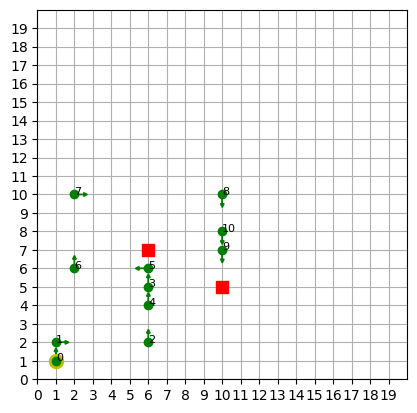

In [163]:

grid_w = 20
grid_h = 20
obstacles = [
    [10, 5, Direction.NORTH],
    [6, 7, Direction.SOUTH]
]
robot_pos = [1, 1]
robot_d = Direction.NORTH
target_pos = None
target_d = None

grid = Grid(grid_w, grid_h)
for idx, obs in enumerate(obstacles):
    # obstacle = Obstacle(obs[0], obs[1], obs[2], idx)
    grid.add_obstacle(Obstacle(obs[0], obs[1], obs[2], idx))
# grid.show_grid()

robot = Robot(robot_pos[0], robot_pos[1], robot_d)
path, cost = optimal_path(grid, robot, True)

ordered_path = []
for pos, dir in path:
    ordered_path.append((pos[0], pos[1], dir))
path = ordered_path

plt_setup()
for obs in obstacles:
    plt_arrow(obs[2], obs[:2], 'r')

print(path)
for idx, (posx, posy, dir) in enumerate(path):
    pos = (posx, posy)
    plt.plot(pos[0], pos[1], 'go')
    plt.text(pos[0], pos[1], str(idx), fontsize=8)
    plt_arrow(dir, pos, 'g')

plt.show()
new_path = clean_path(path)
grid_inst = path_to_grid_inst(new_path)
real_inst = grid_inst_to_real_inst(grid_inst)

# print(new_path)
# print(grid_inst)
# print(real_inst)

# plot new path
plt_setup()
for idx, pos in enumerate(new_path):
    plt.plot(pos[0], pos[1], 'go')
    plt.text(pos[0], pos[1], str(idx), fontsize=8)
    if len(pos)> 2 and  pos[2] != None:
        plt_arrow(pos[2], (pos[0], pos[1]), 'g')

plt.show()
